[2017-04-25 21:30:50,855] Making new env: FrozenLake-v3



SFFF
FHFH
FFFH
HFFG
env.observation_space.n: 16
env.action_space.n: 4
Success rate: 0.936
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


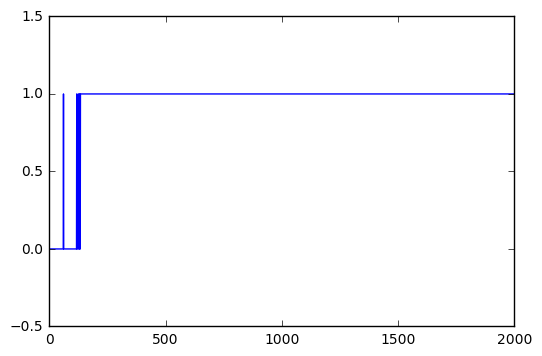

In [1]:
# Dummy Q-Table learning algorithm
from __future__ import print_function

import gym
from gym.envs.registration import register
import numpy as np
import random
import matplotlib.pyplot as plt

register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': False
    }
)

def rargmax(vector):
    # vector: [ 0.  1.  1.  0.]
    # Return the maximum number of an array element.
    m = np.amax(vector)     # m = 1.
    # Return the list of indices of the elements that are non-zero and the given condition is True
    indices = np.nonzero(vector == m)[0]   # indices = [1, 2]
    return random.choice(indices)

env = gym.make("FrozenLake-v3")
env.render()

print("env.observation_space.n:", env.observation_space.n)
print("env.action_space.n:", env.action_space.n)
Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000

# list to contain total rewards and steps per episode
rList = []

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = rargmax(Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, info = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.plot(rList)
plt.ylim(-0.5, 1.5)
plt.show()